## The goal of this case study is to develop a sentiment analysis model that classifies movie reviews as positive or negative using a Long Short-Term Memory (LSTM) neural network. Sentiment analysis is a common Natural Language Processing (NLP) task that helps in understanding the emotional tone behind a series of words.

### Dataset:
The IMDB movie reviews dataset is a popular dataset for binary sentiment classification. It contains 50,000 movie reviews from the IMDB website, divided into 25,000 reviews for training and 25,000 reviews for testing. Each review is labeled as either positive or negative.

### Load and Preprocess the Data

In [1]:
#Load and Preprocess the Data
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import plot_model

# Parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


## Visualize the Data


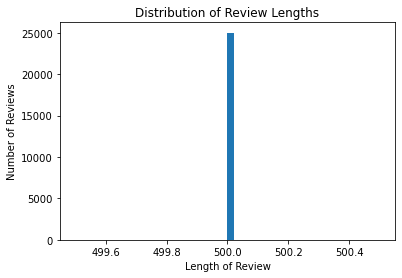

In [2]:
import matplotlib.pyplot as plt

# Visualize the distribution of review lengths
plt.hist([len(x) for x in x_train], bins=50)
plt.xlabel('Length of Review')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()


## Build the model


- def create_model(embedding_size=128, lstm_units=64): declares a function named create_model with two optional arguments: embedding_size and lstm_units, which determine the dimensions of the embedding layer and LSTM layer respectively.

## Model Construction:

- **model = Sequential()**: initializes a sequential model, which allows stacking layers sequentially.
- **model.add(Embedding(max_features, embedding_size, input_length=maxlen))**:  adds an embedding layer to the model. This layer converts input integer sequences into dense vectors of fixed size (embedding_size), useful for handling text data. max_features represents the size of the vocabulary, and maxlen specifies the maximum length of input sequences.
- **model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))**:  adds a Long Short-Term Memory (LSTM) layer to the model. LSTMs are a type of recurrent neural network (RNN) that are capable of learning long-term dependencies in sequential data. The dropout parameter sets the dropout rate for input units, while recurrent_dropout sets the dropout rate for recurrent units, both helping prevent overfitting.
- **model.add(Dense(1, activation='sigmoid'))**: adds a dense output layer with a single neuron and a sigmoid activation function. This layer produces binary classification probabilities, with values between 0 and 1.

- Model Compilation:**model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])** :compiles the model, specifying the loss function (binary_crossentropy for binary classification), the optimizer (adam), and the evaluation metric (accuracy). This step configures the model for training.



### Dropout: 
In TensorFlow, dropout randomly deactivates a fraction of neurons during training, preventing overfitting by encouraging network robustness. It discourages co-adaptation among neurons, fostering independence and generalization. Dropout acts as a form of ensemble learning, training multiple architectures and combining them during inference. Implementation in TensorFlow involves inserting a dropout layer with a specified dropout rate within the neural network architecture. Its role is vital for improving model performance and preventing overfitting in deep learning tasks.


-  This dropout rate is a scalar value representing the fraction of neurons to randomly drop during training. It typically ranges between 0 and 1, where:

- 0 means no neurons are dropped, resulting in no regularization effect.
 - 1 means all neurons are dropped, effectively disabling the network.
 - Commonly used dropout rates fall between 0.1 and 0.5, although the optimal rate may vary depending on the specific task, dataset, and network architecture.

In [3]:
# Build the model
def create_model(embedding_size=128, lstm_units=64):
    model = Sequential()
    model.add(Embedding(max_features, embedding_size, input_length=maxlen))
    model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

model = create_model()

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Visualize the model architecture
#plot_model(model, show_shapes=True)
#plt.show()

#### Windows instructions to see model Architecture
- Download the Graphviz installer from the Graphviz download page.
- Run the installer and follow the installation instructions.
- Add the Graphviz bin directory to your system PATH. Typically, this path is C:\Program Files (x86)\GraphvizX.X\bin.
#### MacOS:
bash
brew install graphviz

## Hyperparameter tuning
Hypertuning, is the process of optimizing the hyperparameters of a machine learning model to achieve the best performance. Hyperparameters are settings that govern the training process and model architecture, which are not learned from the data. In the context of text data, hypertuning is particularly important due to the complexity and high dimensionality of textual features. Here’s a detailed explanation of hypertuning with respect to text data:

## Key Hyperparameters for Text Data
### 1.Vectorization Parameters:

- Vocabulary Size: Limits the number of unique words or tokens to consider.
- n-gram Range: Specifies the range of n-grams (e.g., unigrams, bigrams) to include.
- Max Document Frequency: Filters out words that appear in a high percentage of documents.
- Min Document Frequency: Filters out words that appear in a low percentage of documents.

### 2. Model Parameters:
- Regularization Strength (C or alpha): Controls the degree of regularization applied to avoid overfitting.
- Learning Rate: Governs the step size in the gradient descent optimization.
- Number of Layers and Units: Determines the depth and width of neural networks.
- Dropout Rate: Prevents overfitting by randomly dropping units during training.
- Batch Size: Specifies the number of samples processed before the model’s internal parameters are updated.
- Number of Epochs: Determines the number of times the learning algorithm will work through the entire training dataset.

### 3/ Preprocessing Parameters:

- Text Cleaning Options: Choices such as lowercasing, removing punctuation, and stemming/lemmatization.
- Tokenization Method: The technique used to split text into tokens (e.g., word-level, character-level).
### Hypertuning Techniques
- Grid Search:
Exhaustively searches through a specified subset of hyperparameters.
Example: Testing combinations of n-gram ranges (1,1), (1,2), (1,3) and regularization strengths 0.1, 1, 10.
Random Search:

- Randomly samples hyperparameter combinations.
Can be more efficient than grid search when the search space is large.

- Bayesian Optimization:
Uses probabilistic models to predict performance and select the next hyperparameter set to try.
More efficient than grid and random search as it focuses on the most promising areas of the search space.

- Gradient-Based Optimization:
Techniques like Hyperband or Population Based Training (PBT) that dynamically allocate resources and adapt hyperparameters during training.

### Process of Hypertuning
- Define the Hyperparameter Space:

- Identify the hyperparameters to tune and their possible values or ranges.
- Example for text classification: {'max_features': [1000, 5000, 10000], 'ngram_range': [(1,1), (1,2)], 'alpha': [0.001, 0.01, 0.1, 1]}.
- Split the Data:
Divide the text data into training, validation, and test sets.
Use the training set to train models and the validation set to evaluate hyperparameter combinations.
- Search and Evaluate:
Use a hypertuning method (e.g., grid search) to train models with different hyperparameter combinations.
Evaluate each combination using a performance metric like accuracy, F1 score, or log loss.
- Select the Best Hyperparameters:

- Choose the hyperparameters that yield the best performance on the validation set.
Train a final model on the combined training and validation sets using these hyperparameters.
- Test the Final Model:

Evaluate the final model on the test set to ensure it generalizes well to unseen data.

In [ ]:
#  Train the model using the best parameters
#best_params = random_search_result.best_params_
#model = create_model(embedding_size=best_params['embedding_size'], lstm_units=best_params['lstm_units'])
model.fit(x_train, y_train,
          #batch_size=best_params['batch_size'],
          batch_size = 200,
          epochs=1000,
          validation_data=(x_test, y_test))

Epoch 1/1000
 38/125 [========>.....................] - ETA: 5:59 - loss: 0.6295 - accuracy: 0.6458

In [ ]:
# Evaluate the model
score, acc = model.evaluate(x_test, y_test,
                            batch_size=best_params['batch_size'])
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
# Sample new data for prediction
new_reviews = ["This movie was excellent!", "The movie was terrible..."]

# Preprocess the new data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(new_reviews)
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Make predictions
predictions = model.predict(new_padded_sequences)
print("Predictions:", predictions)